# Analysis of MS/MS Data of TTR Conformational Probes
- TMT samples from 9/12/2017, 1-3 channels are MTTR Olig (4uM, 2uM, 0uM), 4-6 are TTR Tetramer (4uM, 2uM, 0uM)


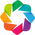

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import holoviews as hv
hv.extension('bokeh')

FAP = pd.read_excel('20171001_MSMS_FAP.xlsx')
# CONTROLS = pd.read_excel('20171001_MSMS_Controls.xlsx')

[(2.0681195692298289, u'Apolipoprotein E isoform 1 (Fragment) OS=Homo sapiens GN=APOE PE=2 SV=1'), (2.410412927965758, u'Transthyretin OS=Homo sapiens GN=TTR PE=1 SV=1'), (4.7253552438599318, u'Clusterin OS=Homo sapiens GN=CLU PE=1 SV=1'), (4.605449689320654, u'Alpha-1-antitrypsin OS=Homo sapiens GN=SERPINA1 PE=1 SV=1'), (4.049551160386871, u'cDNA FLJ54318, highly similar to Complement C1r subcomponent (EC 3.4.21.41) OS=Homo sapiens PE=2 SV=1'), (7.5051514740642942, u'Vitronectin OS=Homo sapiens GN=VTN PE=4 SV=1'), (inf, u'MHC class I antigen (Fragment) OS=Homo sapiens GN=HLA-B PE=3 SV=1')]


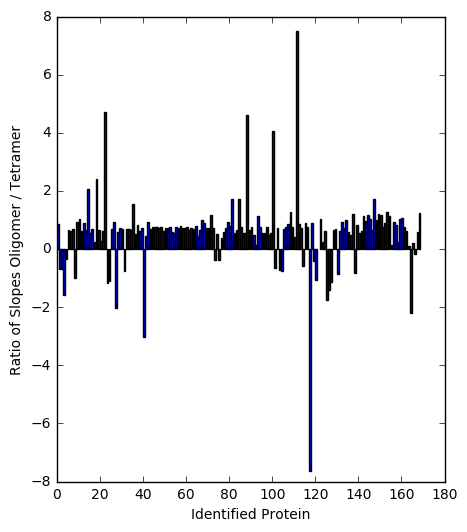

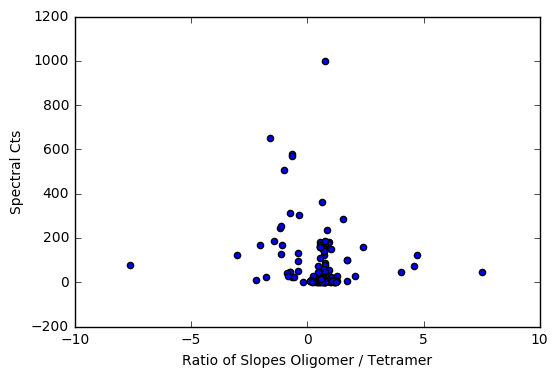

In [3]:
#FAP
FAP_slopes_olig = [linregress([1.0, 0.5, 0.0], FAP.iloc[i,3:6])[0] for i in range(FAP.shape[0])]
FAP_slopes_tet = [linregress([1.0, 0.5, 0.0], FAP.iloc[i,6:9])[0] for i in range(FAP.shape[0])]
FAP_slope_ratio = [FAP_slopes_olig[i]/FAP_slopes_tet[i] for i in range(len(FAP_slopes_olig))]
print [i for i in zip(FAP_slope_ratio, FAP['description']) if i[0] > 2.0]
plt.figure(1, figsize = (5,6) )
plt.bar(range(FAP.shape[0]), FAP_slope_ratio)
plt.xlabel('Identified Protein')
plt.ylabel('Ratio of Slopes Oligomer / Tetramer')
plt.figure(2)
plt.scatter(FAP_slope_ratio, FAP.iloc[:,2])
plt.xlabel('Ratio of Slopes Oligomer / Tetramer')
plt.ylabel('Spectral Cts')
plt.show()

                                           description  slope_ratio
14   Apolipoprotein E isoform 1 (Fragment) OS=Homo ...     2.068120
18      Transthyretin OS=Homo sapiens GN=TTR PE=1 SV=1     2.410413
22          Clusterin OS=Homo sapiens GN=CLU PE=1 SV=1     4.725355
88   Alpha-1-antitrypsin OS=Homo sapiens GN=SERPINA...     4.605450
100  cDNA FLJ54318, highly similar to Complement C1...     4.049551
111       Vitronectin OS=Homo sapiens GN=VTN PE=4 SV=1     7.505151
121  MHC class I antigen (Fragment) OS=Homo sapiens...          inf


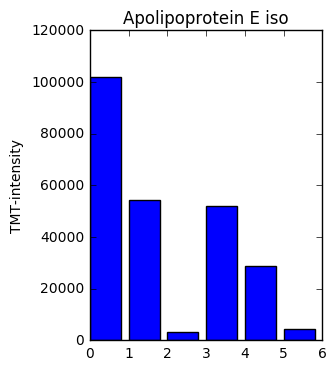

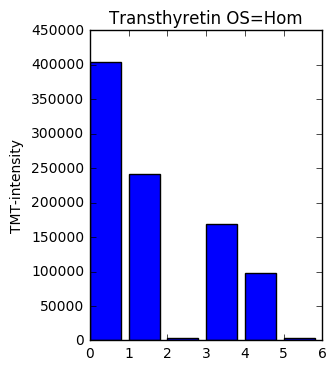

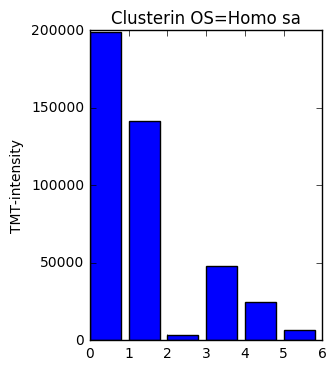

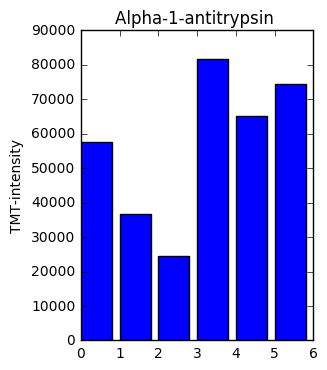

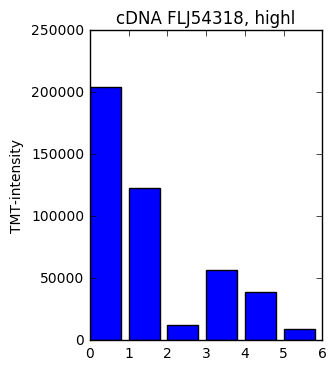

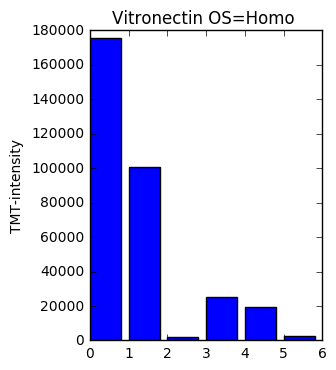

In [40]:
FAP['slope_ratio'] = FAP_slope_ratio
enriched = FAP[FAP['slope_ratio'] > 2.0]

print enriched[['description', 'slope_ratio']]

for i in range(6):
    plt.figure(i,figsize=(3,4))
    plt.bar(range(6), enriched.iloc[i, 3:9])
    plt.title(FAP['description'][enriched.index[i]][:20])
    plt.ylabel('TMT-intensity')
    plt.show()

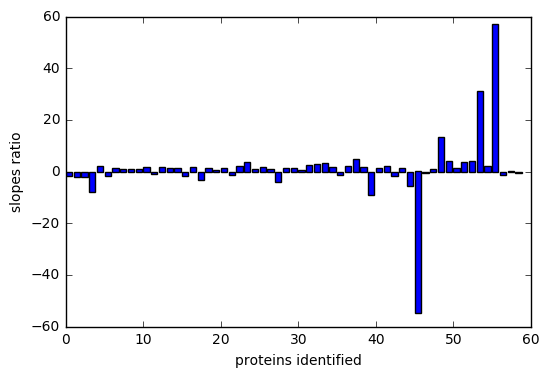

In [41]:
#Controls
Controls_slopes_olig = [linregress([1.0, 0.5, 0.0], CONTROLS.iloc[i,3:6])[0] for i in range(CONTROLS.shape[0])]
Controls_slopes_tet = [linregress([1.0, 0.5, 0.0], CONTROLS.iloc[i,6:9])[0] for i in range(CONTROLS.shape[0])]
Controls_slope_ratio = [Controls_slopes_olig[i]/Controls_slopes_tet[i] for i in range(len(Controls_slopes_olig))] 
plt.bar(range(CONTROLS.shape[0]), Controls_slope_ratio)
plt.ylabel('slopes ratio')
plt.xlabel('proteins identified')
plt.show()

                                          description  slope_ratio
4   Apolipoprotein A-II OS=Homo sapiens GN=APOA2 P...     2.209512
22     Transthyretin OS=Homo sapiens GN=TTR PE=1 SV=1     2.030484
23  Rheumatoid factor D5 light chain (Fragment) OS...     3.497766
31  Complement component 1, q subcomponent, B chai...     2.551453
32  Epididymis secretory sperm binding protein Li ...     2.951029
33         Clusterin OS=Homo sapiens GN=CLU PE=1 SV=1     3.274254
36  Alpha-1-antitrypsin OS=Homo sapiens GN=SERPINA...     2.151371
37  cDNA FLJ54081, highly similar to Keratin, type...     4.713264
41  Serpin peptidase inhibitor, clade A (Alpha-1 a...     2.092624
48       Vitronectin OS=Homo sapiens GN=VTN PE=4 SV=1    13.391367
49  Keratin, type II cytoskeletal 73 OS=Homo sapie...     3.956907
51  Inter-alpha (Globulin) inhibitor H4 (Plasma Ka...     3.822912
52   Complement C4-B OS=Homo sapiens GN=C4B PE=1 SV=2     4.113437
53  cDNA FLJ75066, highly similar to Homo sapiens ...    31.34

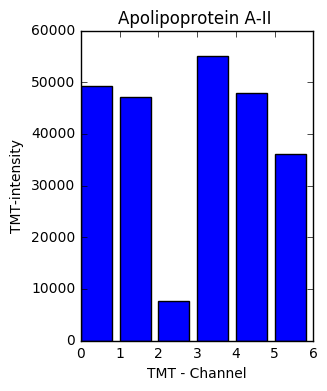

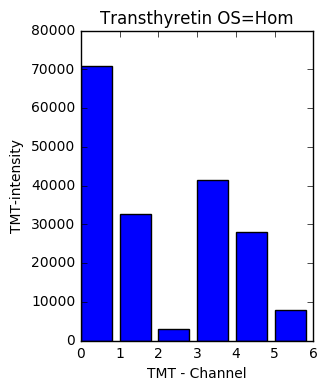

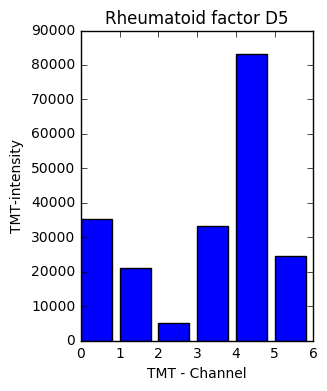

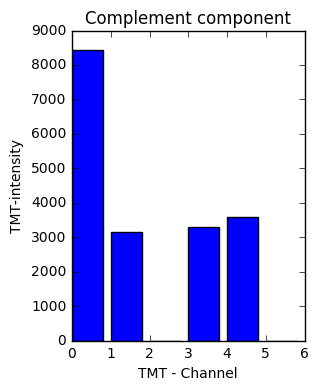

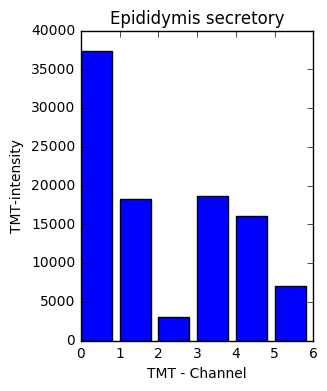

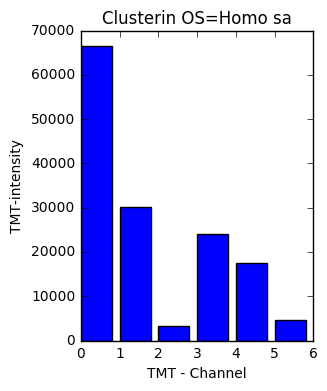

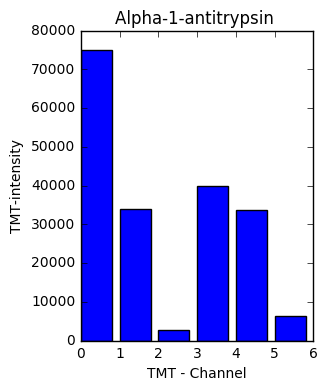

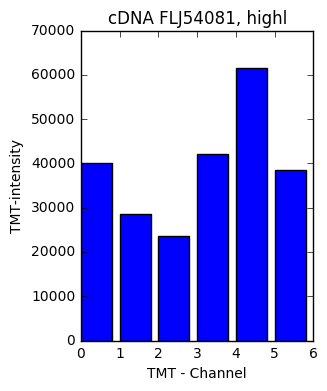

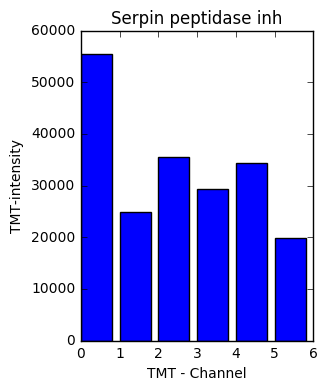

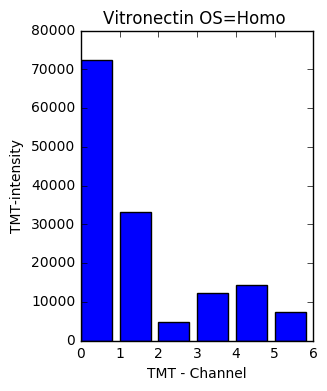

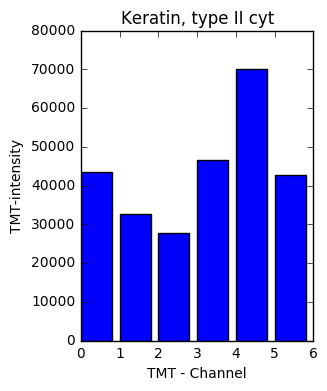

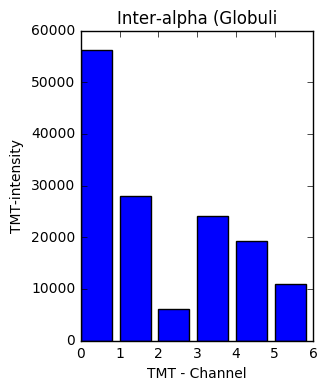

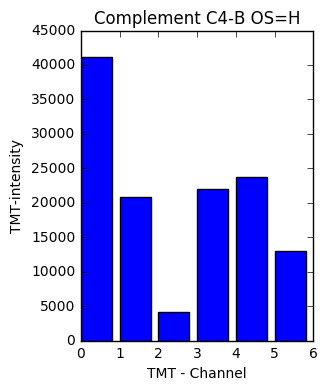

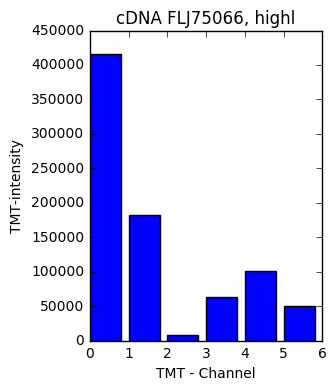

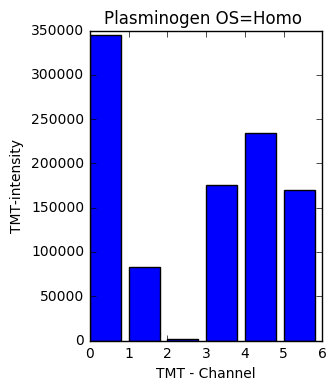

IndexError: single positional indexer is out-of-bounds

In [43]:
CONTROLS['slope_ratio'] = Controls_slope_ratio
enriched = CONTROLS[CONTROLS['slope_ratio'] > 2.0]

print enriched[['description', 'slope_ratio']]

for i in range(len(CONTROLS.index)-1):
    plt.figure(i,figsize=(3,4))
    plt.bar(range(6), enriched.iloc[i, 3:9])
    plt.title(enriched['description'][enriched.index[i]][:20])
    plt.ylabel('TMT-intensity')
    plt.xlabel('TMT - Channel')
    plt.show()
    
